# Homework 2

In HW1, you should have observed a large gap between the training and testing error of the 1-Nearest Neighbor predictor on the noisy spiral data. In this homework, you will work with k-Nearest Neighbor and Decision Tree predictors. Both of them are more robust against noises in data. While you will learn to use these predictors from the `scikit-learn` library, you will also program them from scratch. You will also learn about computing the confidence bounds of the predictors and the learning algorithms.

There are a number of programming **tasks** and **quiz questions** in this homework.
- For **tasks**, you will need to either **add code between comments "`#### TASK N CODE`"** to complete them or **modify code between those comments**. **DO NOT delete the comments "#### TASK N CODE". This is for graders' reference and you might not get full points if you tamper with these comments.**
- For **quiz questions**, you will need to answer in a few sentences between the given lines.
- For **optional tasks**, you are **NOT required to turn them in**. However, we encourage you to complete them as they are good practice.
- For **challenge-optional tasks**, you are **NOT required to turn them in**. However, you will receive extra credit for completing the challenge.

First, download *utils.py*, where some useful helper functions are defined.

In [1]:
!gdown 1h2N74agmTmlbMRtHStcnIIJ7Q2wHu9mb

Downloading...
From (original): https://drive.google.com/uc?id=1h2N74agmTmlbMRtHStcnIIJ7Q2wHu9mb
From (redirected): https://drive.google.com/uc?id=1h2N74agmTmlbMRtHStcnIIJ7Q2wHu9mb&confirm=t&uuid=dfe2fed9-3779-4764-bf1d-4561ed60d6fd
To: /content/utils.py
100% 9.13k/9.13k [00:00<00:00, 21.2MB/s]


Now import the relevant libraries.

In [2]:
from typing import Dict, List, Optional, Tuple

import numpy as np
import matplotlib.pyplot as plt
import utils

In [3]:
seed = 0
np.random.seed(seed)

## Confidence intervals

Recall that in Homework 1 we learned a Nearest Neighbor predictor $h$ for the 2d synthetic data set based on 800 training examples.  
The generalization (i.e. population) error for this predictor is defined as $L_{\cal D}(h)=\Pr(h(x) \not= y)$, where $x,y$ are sampled from the "source distribution" $\cal D$, in this case defined by our synthetic data generating function.  The test error is only an empirical estimator for this generalization error.  Since ultimately we are interested in the generalization error, and not with the performance on some specific test set, we want to understand what the test error tells us about the generalization error.  We can quantify that using a *confidence interval*.  

A confidence interval at confidence level $1-\alpha$ (e.g. $1-\alpha=99\%$) for an unknown unobserved (but determnistic) quantity, in our case the generalization error $L_{\cal D}(h)$, based on an obeserved random quantity, in our case the test error $L_{\textrm{tst}}(h)$, is an interval $[a,b]$ such that $\Pr_{\textrm{tst}}(a \leq L_{\cal D}(h) \leq b)\geq 1-\alpha$.  That is, with probability $1-\alpha$, the quantity of interest (the generalization error) falls within the interval, considering the randomness associated with the test set.

During the first tutorial, we explored several methods for calculating this confidence interval, determining lower and upper limits $a, b$ based on the test error $L_{\textrm{tst}}(h)$ and the number of observations. The methods include:

1.   Hoeffding's Bound
2.   A Gaussian approximation to the bionmial and "pessimistically" bounding the variance independent of the obeserved test error (see tutorial notes)
3.   Wilson's method (see tutorial notes)

Additionally, we'll experiment with methods available in the `scipy.stats.binomtest(k,n).proportion_ci(method)` library function, such as Wilson's (`method="wilson"`, discussed in the tutorial), a refined version of Wilson's method (`method="wilsoncc"`), and an exact calculation with a Gaussian approximation (`method="exact"`, also discussed in the tutorial).

Here are some resources which can be helpful to you.
- [An overview of confidence interval estimation methods](https://www.randomservices.org/random/interval/Bernoulli.html)
- [Wikipedia page on Binomial proportion confidence interbals](https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval)
- [Scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats._result_classes.BinomTestResult.proportion_ci.html)

Further reading:
- [Five confidence intervals for proportions](https://towardsdatascience.com/five-confidence-intervals-for-proportions-that-you-should-know-about-7ff5484c024f)
- [Two-sided confidence intervals for the single proportion: comparison of seven methods](http://stats.org.uk/statistical-inference/Newcombe1998.pdf)


### [Task 1] Confidence interval implementations

First, please finish the functions below for the calculation of the Hoeffding's and Wilson's confidence intervals.

In [4]:
import scipy.stats

def hoeffding_ci(Ls, m, alpha=0.05):
    from math import log
    # TASK 1 CODE
    # DO NOT use scipy.stats.binomtest.proportion_ci in this function
    # You should calculate the confidence interval by yourself
    eps = (log(2/alpha)/(2*m))**(1/2)
    # TASK 1 CODE
    return (Ls-eps, Ls+eps)

def pessi_ci(Ls, m, alpha=0.05):
    z = scipy.stats.norm.isf(alpha/2)
    eps = z*(0.25/m)**(1/2)
    return (Ls-eps, Ls+eps)

def wilson_ci(Ls, m, alpha=0.05):
    # TASK 1 CODE
    # DO NOT use scipy.stats.binomtest.proportion_ci in this function
    # You should calculate the confidence interval by yourself
    z = scipy.stats.norm.isf(alpha/2)
    eps = (m/(m+z**2))*z*( Ls*(1-Ls)/m + (z**2)/(4*m**2) )**(1/2)
    mid = (m/(m+z**2))*(Ls+z**2/(2*m))
    # TASK 1 CODE
    return (mid-eps, mid+eps)

def ci_using_scipy(Ls, m, alpha=0.05, method='exact'):
    return tuple(scipy.stats.binomtest(round(m*Ls), m).proportion_ci(confidence_level=1-alpha, method=method))

Here we print out the 95% confidence intervals estimated with different methods with test error $L_S=0.135$ and testset size $m=200$, i.e. we had errors on $27$ of the $200$ training examples . As a sanity check, the result of your Wilson's confidence interval implementation ``wilson_ci`` should be identical to the result of the Scipy implementation ``ci_using_scipy(..., method='wilsoncc')``.

In [5]:
def print_confidence_intervals(Ls, m, alpha=0.05):
    print(hoeffding_ci(Ls, m, alpha))
    print(pessi_ci(Ls, m, alpha))
    print(wilson_ci(Ls, m, alpha))
    print(ci_using_scipy(Ls, m, alpha, method='wilson')) # sanity check--should be the same as your implementation
    print(ci_using_scipy(Ls, m, alpha, method='wilsoncc'))
    print(ci_using_scipy(Ls, m, alpha))

print_confidence_intervals(27/200, 200)

(0.03896772086800793, 0.2310322791319921)
(0.0657048087825161, 0.2042951912174839)
(0.09446570454787909, 0.18929138370752555)
(0.09446570454787909, 0.18929138370752555)
(0.09237125047890246, 0.19209759427492426)
(0.09088710175486887, 0.1903091726833983)


<span style="color: red">
<h4 style="font-weight: bold">[Answer Questions]</h4>

Experiment with different values of testset size and test error, especially when the test error is small (close to zero, with only a few mistakes in the test set) or even zero (ie there are no errors on the test set).  Show us some examples and summarize in 1-2 sentences how the Hoeffding, Pessimistic, Wilson, and Exact confidence intervals behave and differ.
    
<h4 style="font-weight: bold">---------------------</h4>

<span style="color: blue">
Answer:

- The confidence intervals estimated by Hoeffding and Pessimistic methods include range smaller than 0. We can simply clamp the range above zero to get a tighter confidence interval estimation.
- The Pessimistic interval is tighter than Hoeffding interval.
- ...

</span>

<h4 style="font-weight: bold">---------------------</h4>
</span>

### Nearest-Neighbor predictor

Now, let's get back to the Nearest-Neighbor predictor and the synthetic spiral data used in HW1. Below is the code for the NN predictor in HW1, with the same bug. **You should copy your answer to Task 2 of HW1 here to finish the implementation of the NN predictor.**

In [6]:
from scipy import stats

class NearestNeighborPredictor:
    '''
    Use as:
        ```
        nn_clf = NearestNeighborPredictor() # Nearest neighbor predictor
        nn_clf.fit(X_train, y_train)
        y_test_predict = nn_clf.predict(X_test)
        ```
    '''
    def __init__(self):
        # Need to save the training points for prediction
        self.X_train = None
        self.y_train = None

    def fit(self, X: np.ndarray, y: np.ndarray):
        '''
        Trains a Nearest Neighbor predictor on training data (X, y).

        Args:
            X: data features
            y: data labels
        '''
        # Save the training points; to be used during prediction
        self.X_train = X
        self.y_train = y

    def predict(self, X: np.ndarray) -> np.ndarray:
        '''
        Predicts the labels for data X using the trained predictor.

        Args:
            X: data features

        Returns:
            y: labels, same number as the data points
        '''
        assert (self.X_train is not None) and (self.y_train is not None), '1NN not trained!'
        n_test = len(X)
        n_train = len(self.X_train)

        S = np.sum(X**2, axis=1)
        R = np.sum(self.X_train**2, axis=1)
        G = X @ self.X_train.T
        D2 = S[:, np.newaxis] + R[np.newaxis, :] - 2 * G
        one_nearest = np.argsort(D2, axis=1)[:, :1]
        y = self.y_train[one_nearest]

        return y.squeeze()

In [7]:
from utils import TrainAndTestData

LABELS = [-1, 1]
SP_THETA_SIGMA = 0.3
SP_R_SIGMA = 0.05
NOISE_LEVEL = 0.2

m = 1000
def source(m):  # define out `source distribution`
    return utils.generate_spiral_data(m, noise_level=NOISE_LEVEL, theta_sigma=SP_THETA_SIGMA, r_sigma=SP_R_SIGMA)
Xsp, ysp = source(m)

train_test_ratio = 0.8
Xsp_train, ysp_train, Xsp_test, ysp_test = utils.create_split(Xsp, ysp, train_test_ratio)
spirals = TrainAndTestData(Xsp_train, ysp_train, Xsp_test, ysp_test)

In [8]:
nn_clf = NearestNeighborPredictor()
nn_clf.fit(spirals.X_train, spirals.y_train)

### [Task 2] Confidence intervals of a Nearest-Neighbor predictor

Now, calculate the confidence intervals for the generalization error of the learned Nearest-Neighbor predictor on the synthetic spiral data, with `scipy`'s implementation of Wilson's method.

In [9]:
# TASK 2 CODE
test_err = utils.empirical_err(nn_clf, Xsp_test, ysp_test)
print(ci_using_scipy(test_err, len(ysp_test), method='wilson'))
# TASK 2 CODE

(0.1199685532821731, 0.22265781539059554)


### [Task 3] Number of test samples needed to obtain a precise estimation of test error

Since we have access to the source distribution using the function `utils.generate_spiral_data`, we can reduce the size of the confidence interval and get more accurate measurements of the generalization error by using more test samples. Try different test set sizes, and find the amount of test data needed for a generalization error within a precision of 0.005 with confidence 99%. How many test samples did you use? Try to find the number of test samples needed for Hoeffding's method, pessimistic method, and Wilson's method. How much do they differ?

In [10]:
# Calculate the generalization error of nn_clf
def print_99_confidence_intervals(ci, extra_m):
    np.random.seed(31020)
    extra_X, extra_y = Xsp, ysp = source(extra_m)
    extra_err = utils.empirical_err(nn_clf, extra_X, extra_y)
    (bottom, top) = ci(extra_err, extra_m, alpha=0.01)
    print(ci.__name__)
    print(f"With probability at least 99%, the generalization error is within ({bottom}, {top})")
    print(f"This was calculated using {extra_m} samples")

# TASK 3 CODE
# ci = ??? # hoeffding_ci, pessi_ci, or wilson_ci
# n_test_samples = ??? # the number of test samples needed for individual confidence interval estimation methods
# print_99_confidence_intervals(ci, n_test_samples)
ci = hoeffding_ci
n_test_samples = 105000
print_99_confidence_intervals(ci, n_test_samples)

ci = pessi_ci
n_test_samples = 67000
print_99_confidence_intervals(ci, n_test_samples)

ci = wilson_ci
n_test_samples = 38500
print_99_confidence_intervals(ci, n_test_samples)
# END TASK 3 CODE

hoeffding_ci
With probability at least 99%, the generalization error is within (0.17185323490224322, 0.1818991460501377)
This was calculated using 105000 samples
pessi_ci
With probability at least 99%, the generalization error is within (0.16935270982211337, 0.1793040065957971)
This was calculated using 67000 samples
wilson_ci
With probability at least 99%, the generalization error is within (0.17067148658312678, 0.18066108072451906)
This was calculated using 38500 samples


### [Task 4] Confidence intervals for the spam predictor

Now, return to the SPAM prediction problem. We have investigated two predictors so far: the constant "no spam" predictor, and a word conjunction predictor. Please provide a 95% confidence intervals for the generalization error of the constant predictor and the word conjunction predictor using "call", "http", and "urgent" as the `spam_words`. Report the confidence intervals evaluated with `scipy`'s implementation of Wilson's method.

In [11]:
!mkdir $PWD/data
!gdown 16_ewUNot4JFwRFwBsp1VzqFTutriUrk5 -O $PWD/data/

Downloading...
From: https://drive.google.com/uc?id=16_ewUNot4JFwRFwBsp1VzqFTutriUrk5
To: /content/data/SMSSpamCollection
100% 390k/390k [00:00<00:00, 25.4MB/s]


In [12]:
import os
from utils import ConstantFalsePredictor, WordConjPredictor

Xr, yr = utils.read_sms_spam_data(os.path.join(os.getcwd(), 'data/SMSSpamCollection'))
spamdata = TrainAndTestData(*utils.create_split(Xr, yr, 0.7))

# TASK 4 CODE
print("Constant false predictor")
constant_clf = ConstantFalsePredictor()

test_err = utils.empirical_err(constant_clf, spamdata.X_test, spamdata.y_test)

print(ci_using_scipy(test_err, len(spamdata.y_test), method='wilson'))

print("Word conjunction predictor")
spam_words = ["call", "http", "urgent"]
prog_clf = WordConjPredictor()
prog_clf.program_words(spam_words)

test_err = utils.empirical_err(prog_clf, spamdata.X_test, spamdata.y_test)

print(ci_using_scipy(test_err, len(spamdata.y_test), method='wilson'))
# TASK 4 CODE

Constant false predictor
(0.11039915982489647, 0.14687390001619272)
Word conjunction predictor
(0.0886630915903186, 0.12209262335564042)


<span style="color: red">
<h4 style="font-weight: bold">[Answer Questions]</h4>

Compare the confidence intervals of the word conjunction predictor and the constant predictor, do they differ significantly (i.e. do the confidence intervals intersect?).  Is it possible to conclude one is better than the other?
    
<h4 style="font-weight: bold">---------------------</h4>

<span style="color: blue">
Answer: The 95% confidence intervals overlap each other. Therefore, we cannot conclude either of the predictors to be better than the other.
</span>

<h4 style="font-weight: bold">---------------------</h4>
</span>

 Note that here, the “source distribution” is some real distribution over SMSs. To get a tiger confidence interval, we will need to obtain more samples from this distribution.

### Confidence intervals for learning methods

In the experiments above, we obtained a confidence measure for the performance of a specific predictor.  This predictor might be the result of applying a learning rule (eg. the Nearest-Neighbor rule) or not (like the spam predictor we defined with our choice of `spam_words`). No matter how we attained the predictor, we used the same analysis to determine the quality of the predictor (the test error and the confidence interval). The analysis was only relevant to the individual predictor, and has nothing to do with the learning rule.

A separate question we might want to ask is “how good a learning rule is?”. For example, we might want to estimate the expected generalization error when applying a learning rule $A$ to a set of random i.i.d. samples, i.e. $\mathbb{E}_{S\sim {\cal D}^m}[L_{\cal D}(A(S))]$, with $D^m$ being the training distribution and $S$ being i.i.d. samples from the training data.

However, when we estimate the mean of a random variable $L_{\cal D}(A(S))$, two problems arise: (1) we do not know the mean w.r.t.~$S$, and (2) for a specific $S$, we cannot caclulate $L_{\cal D}(A(S))$ exactly.
We can only estimate $L_{\cal D}(A(S))$ via the test error $L_{S_\textrm{tst}}(A(S))$. Fortunately, it can be verified that $\mathbb{E}_{S\sim {\cal D}^m}[L_{\cal D}(A(S))] = \mathbb{E}_{S_\textrm{tr} \sim{\cal D}^m, S_\textrm{tst} \sim {\cal D}^{m_\textrm{tst}}, }[L_{\cal S_\textrm{tst}}(A(S_\textrm{tr}))]$, where $S_\textrm{tr}$ and $S_\textrm{tst}$ are independent. [Ask yourself: does the test set size $m_\textrm{tst}$ matter here?]. We can therefor draw $r$ multiple independent training and test sets, and estimate $\mathbb{E}_{S\sim {\cal D}^m}[L_{\cal D}(A(S))]$ using the empirical average $\frac{1}{r} \sum_{i=1}^r L_{\cal S^i_\textrm{tst}}(A(S^i_\textrm{tr}))$.

### [Task 5] Calculate confidence intervals for learning methods

Calculate $\mathbb{E}_{S\sim {\cal D}^m}[L_{\cal D}(A(S))]$ for Nearest Neighbor predictor on the spiral data using 100 training points ($|S_{tr}|=100$) and 10 testing points ($|S_{tst}|=10$) from the distribution above. Find the smallest $r$ that resuls in an emphirical error within a precision of 0.01 with confidence 95% estimated by Wilson's method. What is the resulted empirical error, and what it the value of $r$?

Notably, the random variable we are drawing and estimating the mean of is not Bernoulli; therefore, its average is not a scaled Binomial. However, the empirical average, represented as $\frac{1}{r} \sum_{i=1}^r L_{\cal S^i_\textrm{tst}}(A(S^i_\textrm{tr}))$, remains a sum of i.i.d. random variables and is, therefore, approximately Gaussian.
Importantly, $0 \leq L_{\cal S_\textrm{tst}}(A(S_\textrm{tr})) \leq 1$ is bounded, so the variance of this empirical average can be bounded in terms of its mean. Therefore, the calculations used in obtaining Wilson's confidence interval remain valid.

In [13]:
errors = []
# TASK 5 CODE
# You may generate trainin and testing sets in this way:
# trX, trY = source(100)
# tstX, tstY = source(10)
for log_reps in np.arange(5.0, 16.0, 0.25):
    reps = int(np.exp(log_reps))
    while True:
        trX, trY = source(100)
        tstX, tstY = source(10)
        nn_clf = NearestNeighborPredictor()
        nn_clf.fit(trX, trY)
        errors.append(np.mean(nn_clf.predict(tstX) != tstY))

        if len(errors) >= reps:
            ci = wilson_ci(np.mean(errors), len(errors), alpha=0.05)
            break
    if ci[1] - ci[0] <= 0.02:
        break
# TASK 5 CODE

print(f"With r={len(errors)}, the Nearest-Neighboar learning method has an empirical error within a precision of 0.01 of {np.mean(errors)} with confidence 95%.")

With r=6310, the Nearest-Neighboar learning method has an empirical error within a precision of 0.01 of 0.20453248811410457 with confidence 95%.


## $k$-Nearest Neighbor Predictor

In the second part of this Notebook, we will extend the Nearest-Neighbor predictor, such that the predictor takes $k$ nearest training samples into consideration when predicting the label of a test sample, resulting in a $k$-Nearest Neighbor Predictor. We use majority vote (implemented with the [`mode` function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html) from `scipy.stats` library) in case that the $k$ nearest neighbors have different labels.

We implement a $k$-Nearest Neighbor predictor using `numpy` functions as below. It has a similar bug as that in the Task 2 of HW1. **You should copy your answer in HW1 to the implementation below to finish the implementation of the k-Nearest Neighbor predictor.**

In [14]:
from scipy import stats


class kNearestNeighbors:
    '''
    Use as:
        ```
        clf = kNearestNeighbors(n_neighbors=k) # k-nearest neighbor predictor
        clf.fit(X_train, y_train)
        y_test_predict = clf.predict(X_test)
        ```
    '''
    def __init__(self, n_neighbors: int):
        assert n_neighbors > 0
        self.n_neighbors = n_neighbors

        # Need to save the training points for prediction
        self.X_train = None
        self.y_train = None

    def fit(self, X: np.ndarray, y: np.ndarray):
        '''
        Trains a k-Nearest Neighbor predictor with n_neighbors neighbors on training data (X, y).

        Args:
            X: data features
            y: data labels
        '''
        # Save the training points; to be used during prediction
        self.X_train = X
        self.y_train = y

    def predict(self, X: np.ndarray) -> np.ndarray:
        '''
        Predicts the labels for data X using the trained predictor.

        Args:
            X: data features

        Returns:
            y: labels, same number as the data points
        '''
        assert (self.X_train is not None) and (self.y_train is not None), 'kNN not trained!'
        n_test = len(X)
        n_train = len(self.X_train)

        # x_i^T x_i is the dot product of x_i with itself; can be calculated by
        # squaring each x_{ij} and summing over j dimensions
        S = np.sum(X**2, axis=1) # shape (n_test)

        # Similarly calculate z_j^T z_j for the R matrix
        R = np.sum(self.X_train**2, axis=1) # shape (n_train)

        # x_i^T z_j is the inner product between matrices X and Z, giving
        # G_{ij}
        G = X @ self.X_train.T # shape (n_test, n_train)

        # Use broadcasting to calculate D2. Reference: https://numpy.org/doc/stable/user/basics.broadcasting.html
        # Need to replicate S_i n_train times along the column dimension
        # and replicate R_j n_test times along the row dimension before adding them
        # to get S_{ij} = x_i^T x_i and R_{ij} = z_j^T z_j. These can then be added to get D2
        # With broadcasting, we can do this by adding a placeholder column axis
        # to S and placeholder row axis to R before adding them.
        D2 = S[:, np.newaxis] + R[np.newaxis, :] - 2 * G

        # Now get indices of n_neighbors nearest training points
        # np.argsort returns the indices for sorting a matrix's elements along an axis
        # in ascending order; pick at most n_neighbors neighbors
        k_nearest = np.argsort(D2, axis=1)[:, :self.n_neighbors] # shape (n_test, self.n_neighbors)

        # Map the training indices to labels
        y = self.y_train[k_nearest] # shape (n_test, self.n_neighbors)

        # Get the majority vote for each test point, so take the mode of training labels
        # (across column dimension)
        y = stats.mode(y, axis=1)[0].squeeze() # shape (n_test)

        return y

#### Decision boundaries

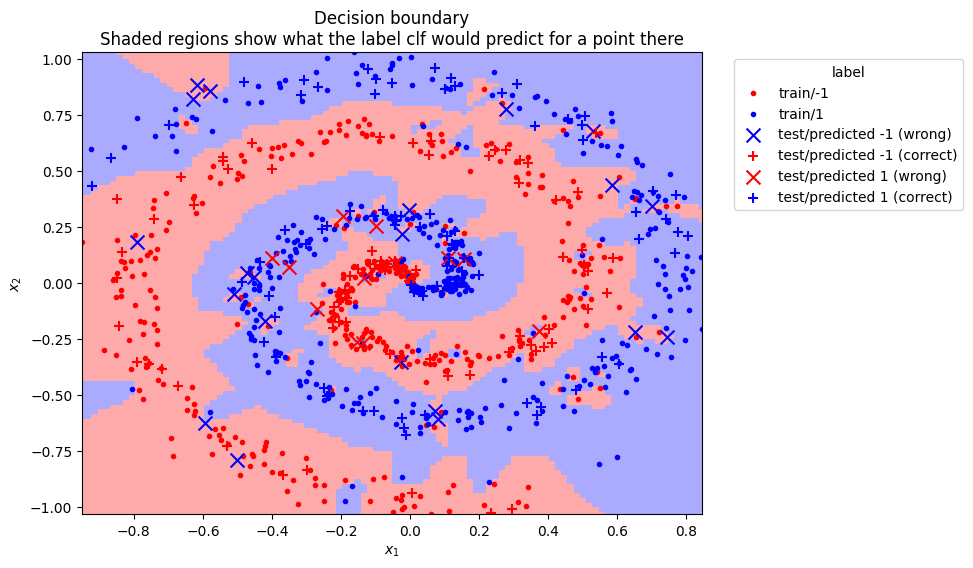

In [15]:
knn_clf = kNearestNeighbors(n_neighbors=1)
knn_clf.fit(spirals.X_train, spirals.y_train)

utils.plot_decision_boundary(knn_clf, spirals.X_train, spirals.y_train, spirals.X_test, spirals.y_test)

#### Calculate the train and test errors


In [16]:
# Train the predictor
knn_clf = kNearestNeighbors(n_neighbors=1)
knn_clf.fit(spirals.X_train, spirals.y_train)

# Get training error
spirals.print_errors(knn_clf)

Train error: 0.00%
Test error: 16.50%


<span style="color: red">
<h4 style="font-weight: bold">[Answer Questions]</h4>

What is the runtime and memory complexity for making predictions on $n$ points in $\mathbb{R}^d$ using a $k$-Nearest Neighbor predictor based on $m$ training points? You can assume memory accesses and arithmetic operations on floating point numbers take $O(1)$ time, and storing a floating point number takes $O(1)$ space. Express the complexities as a function of $m, n, k, d$.
    
<h4 style="font-weight: bold">---------------------</h4>

<span style="color: blue">

Runtime: $O(mnd)$

Memory: $O(md+nd)$

</span>

<h4 style="font-weight: bold">---------------------</h4>
</span>

You will realize that predicting with $k$-Nearest Neighbor predictors becomes computationally expensive as the number of training points increases. In relatively low dimensions, clever geometric data structures and methods, such as kd-trees and ball trees, can be used to quickly search for the nearest neighbors of a given data point.  In high dimensions, which is the more common situation in machine learning, approximate methods are used, such as the popular locality sensitive hashing (LSH) approximate nearest neighbor data structure.  These methods are beyond the scope of our course.  See brief discussion and references in Section 19.3 of [UML] as well as the following references:
1. [Wikipedia article on Nearest Neighbor Search](https://en.wikipedia.org/wiki/Nearest_neighbor_search)
2. [Cornell's CS 4780 class notes](https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote16.html) by Kilian Weinberger
3. [Introduction chapter](http://people.csail.mit.edu/gregory/annbook/introduction.pdf) of Nearest Neighbor Methods in Learning and Vision: Theory and Practice by Gregory Shakhnarovich, Piotr Indyk, and Trevor Darrell

#### `scikit-learn` library
We will now introduce the `scikit-learn` data science [library](https://scikit-learn.org/stable/), which provides efficient datasets and efficient implementations of various Machine Learning learning rules. Training a $k$-Nearest Neighbor predictor is simple, for instance, using `scikit-learn`'s [k-nearest neighbor implementation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). This implementation uses either kd-trees or ball trees (depending on the input; see documentation), which are more efficient for 2-dimensional data than our `kNearestNeighbors`. In the cell below, we show how training and predicting with `scikit-learn` is straightforward. It's up to you if you want to use `scikit-learn`'s implementation in the later tasks.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(spirals.X_train, spirals.y_train)

spirals.print_errors(knn_clf)

Train error: 0.00%
Test error: 16.50%


### Try different $k$'s for $k$-Nearest-Neighbor predictors

Now we have implemented a $𝑘$-NN predictor. With $k=1$, it is equivalent to the 1-NN predictor in HW1. Now, let's try different values for $k$ and see what differences we can observe.

k = 2
Train error: 8.38%
Test error: 17.50%
k = 5
Train error: 8.62%
Test error: 6.50%
k = 9
Train error: 8.75%
Test error: 6.00%
k = 18
Train error: 9.00%
Test error: 6.00%
k = 34
Train error: 10.62%
Test error: 7.50%
k = 63
Train error: 13.75%
Test error: 15.00%
k = 120
Train error: 36.00%
Test error: 45.00%
k = 226
Train error: 43.38%
Test error: 48.50%
k = 425
Train error: 58.00%
Test error: 59.50%
k = 799
Train error: 49.00%
Test error: 52.50%


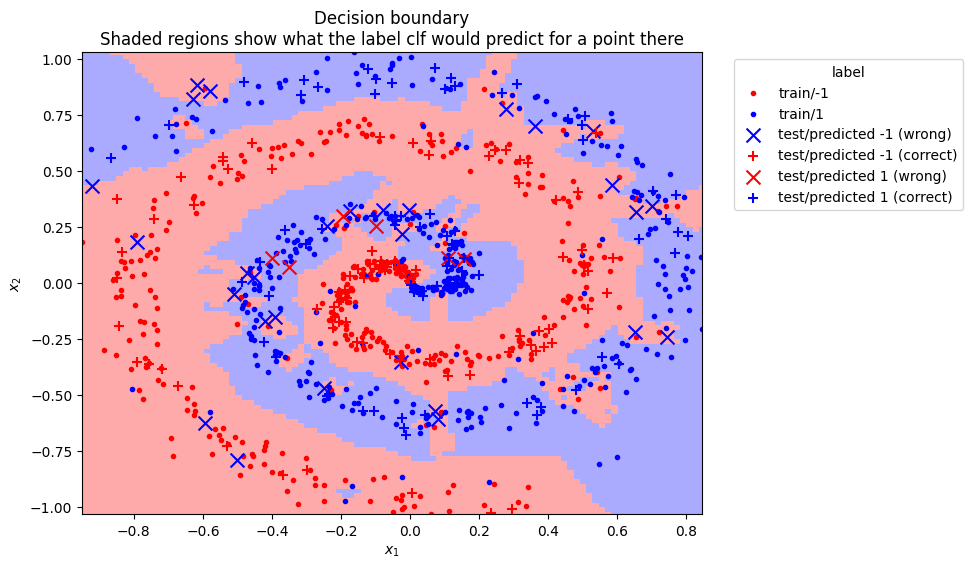

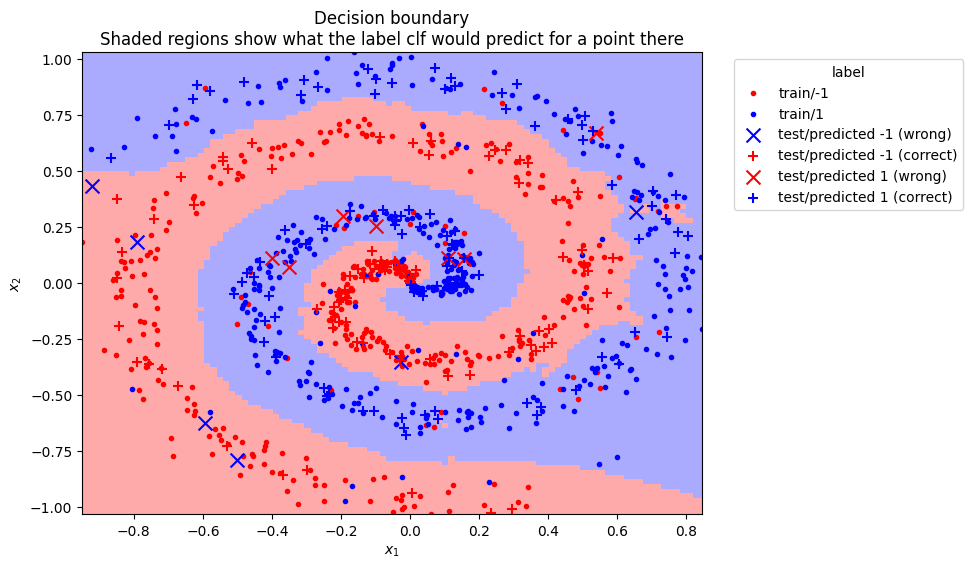

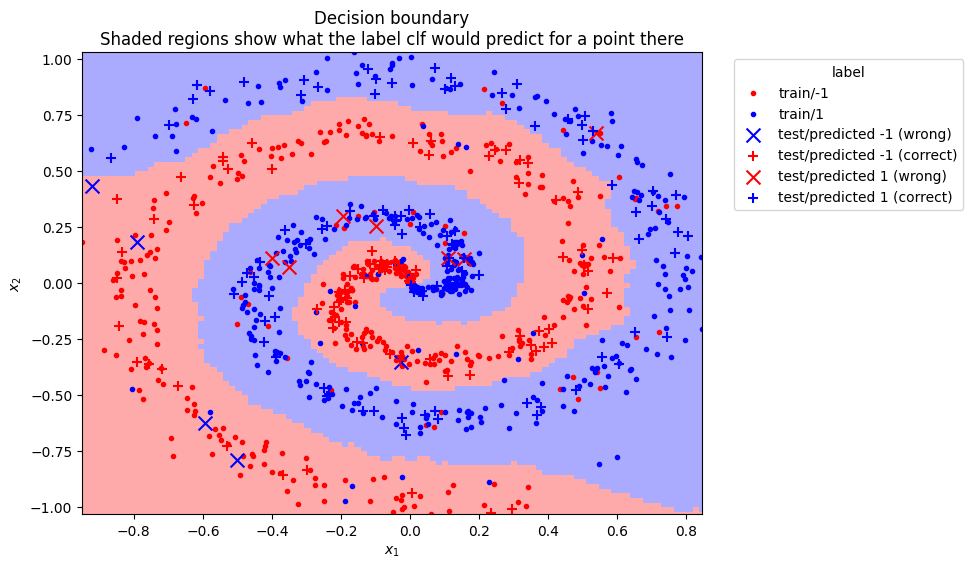

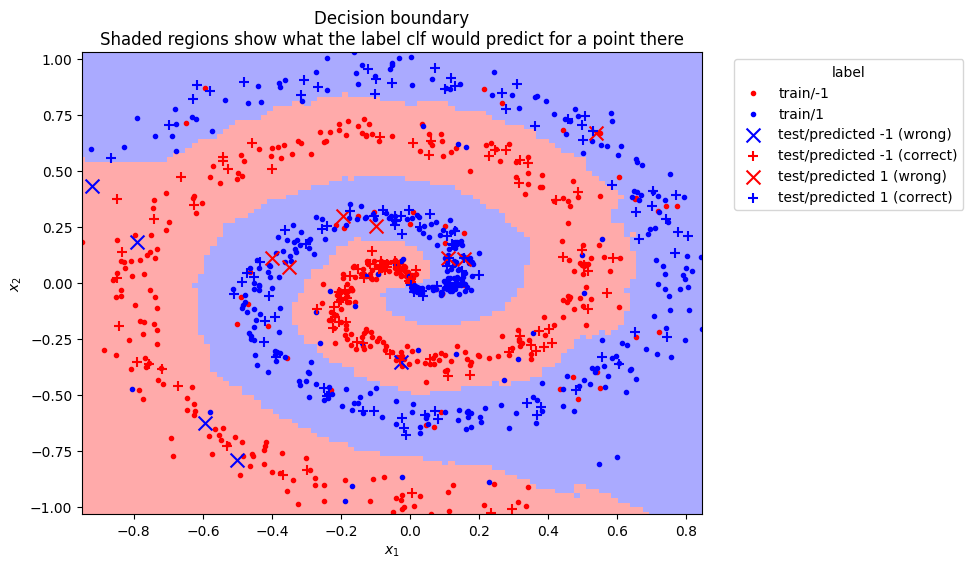

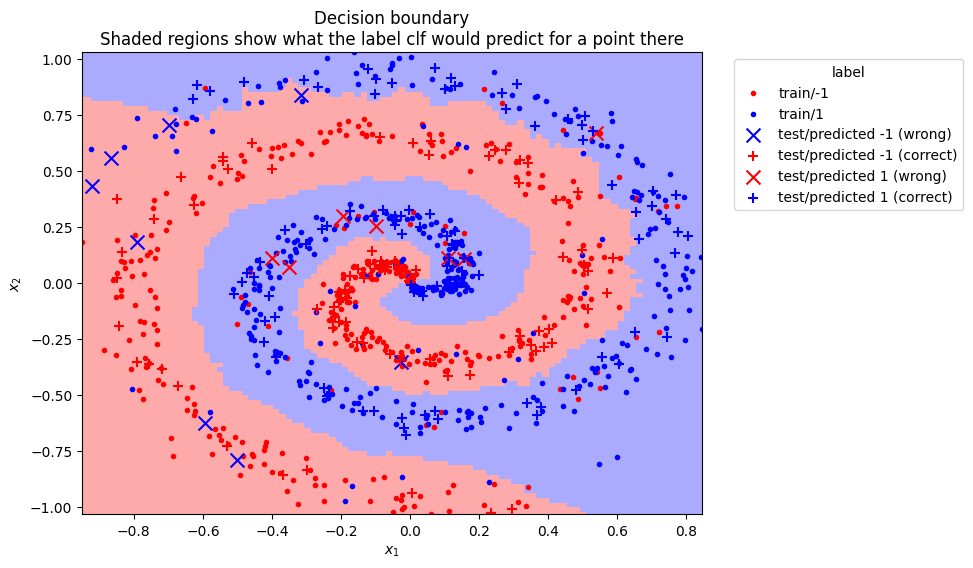

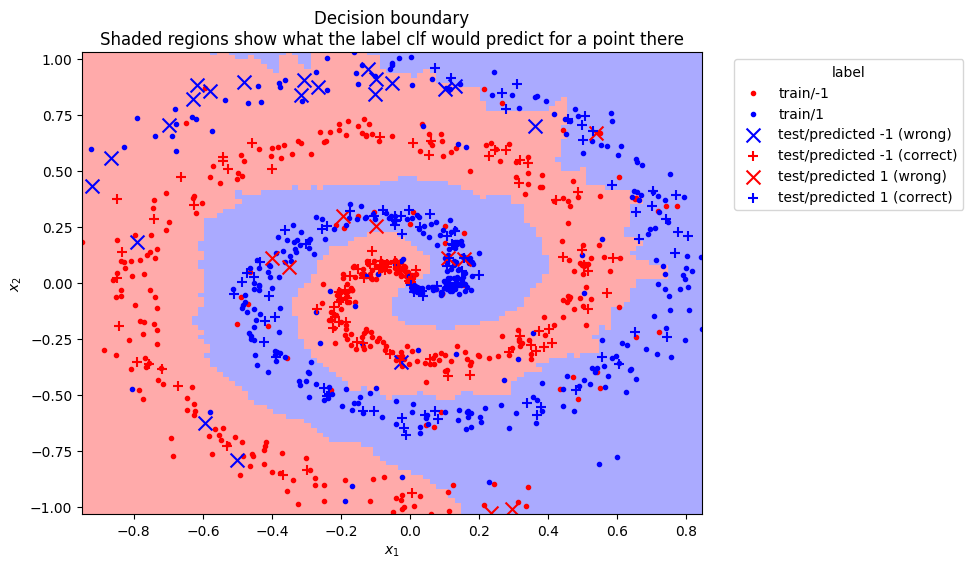

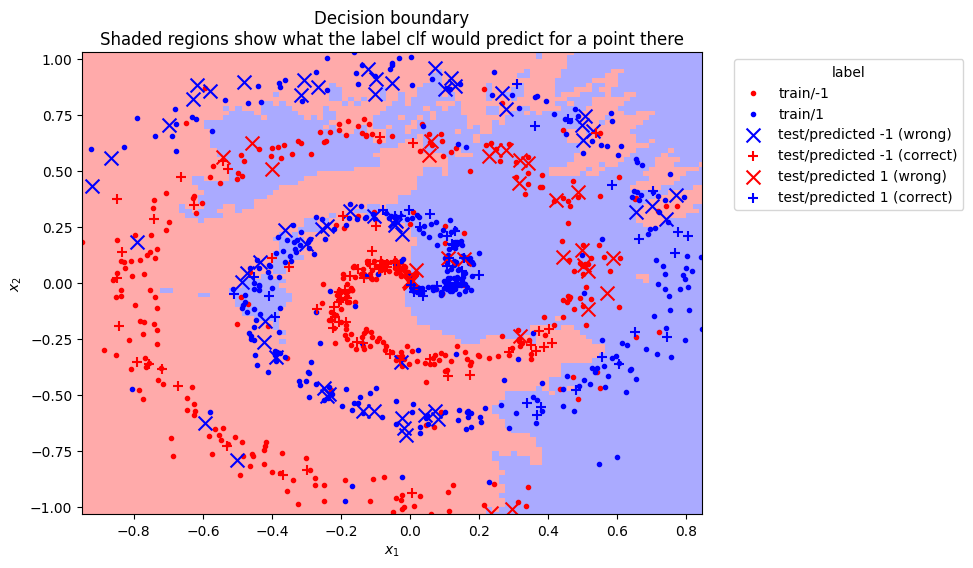

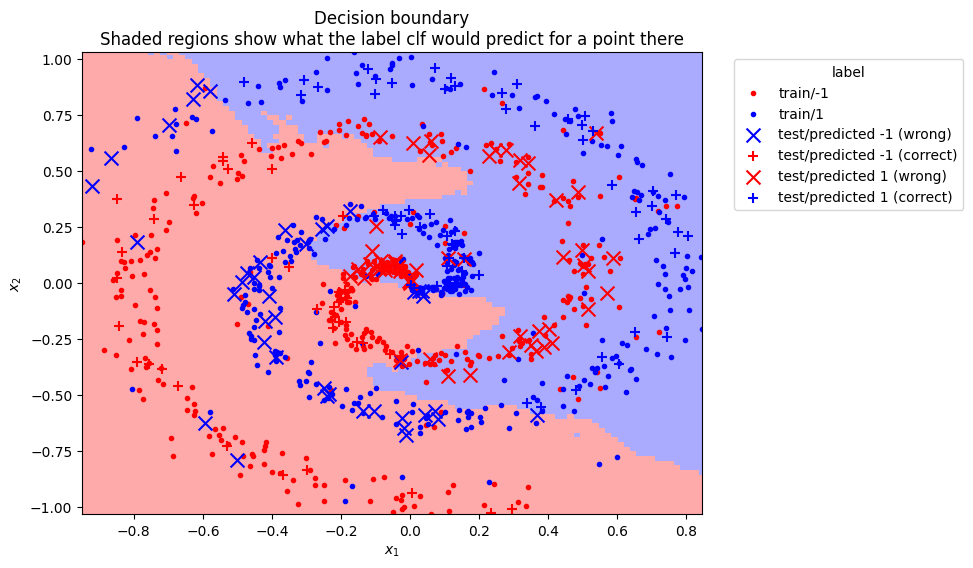

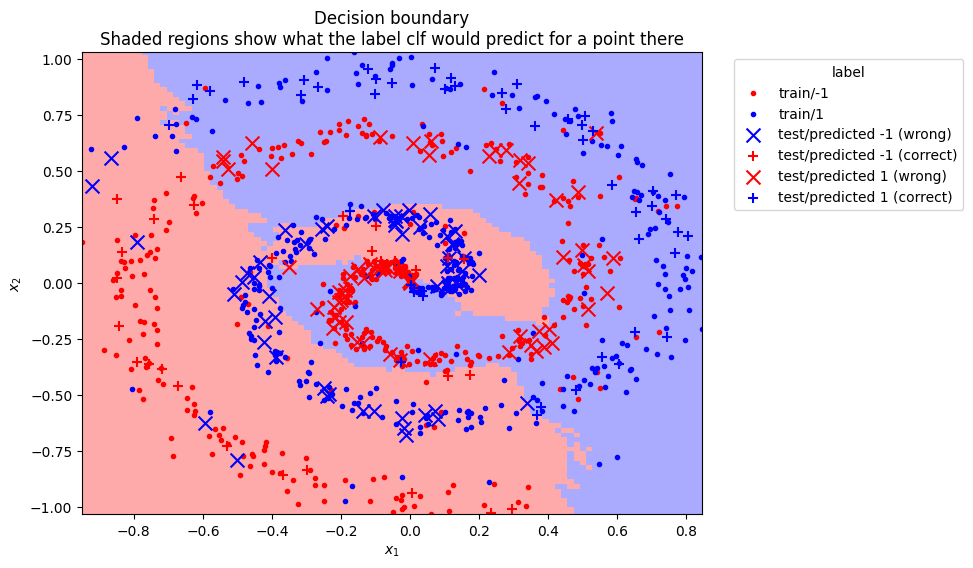

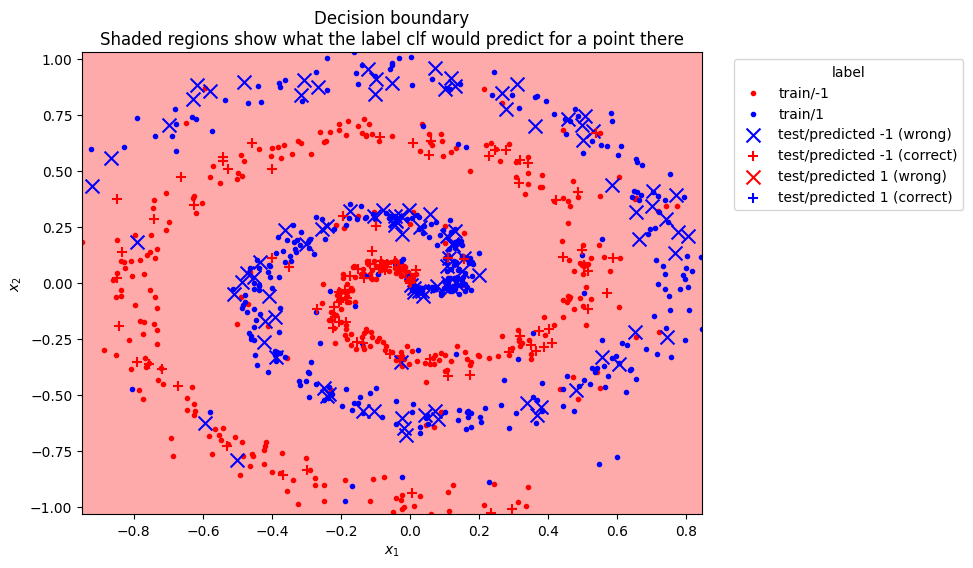

In [18]:
for log_n_neighbors in np.linspace(1, np.log(len(spirals.X_train)), 10):
    n_neighbors = int(np.exp(log_n_neighbors))
    print(f'k = {n_neighbors}')
    knn_clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_clf.fit(spirals.X_train, spirals.y_train)

    spirals.print_errors(knn_clf)
    utils.plot_decision_boundary(knn_clf, spirals.X_train, spirals.y_train, spirals.X_test, spirals.y_test)

<span style="color: red">
<h4 style="font-weight: bold">[Answer Questions]</h4>

What differences do you observe from the k-NN predictors with different k?<br>

<h4 style="font-weight: bold">---------------------</h4>

<span style="color: blue">
Answer:

- When $k$ is small, the decision boundary is unsmooth.
- $k$-NN works well when $5 \leq k \leq 50$.
- When $k$ is too large, some data points that are too far away are also considered as "neighbors", which result in prediction error.
- When $k$ equals the size of the dataset, the $k$-NN predictor simply does majority vote.

</span>

<h4 style="font-weight: bold">---------------------</h4>
</span>

### [Task 6] Training and testing error as a function of $k$
Plot the training and testing errors as functions of $k$, where $k$ ranges from $1$ to the size of the training set. You don't need to cover all possible values of $k; showing the trend is sufficient.

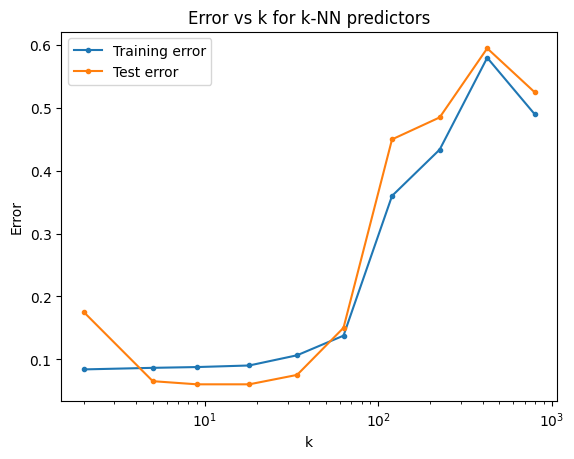

In [19]:
# TASK 6 CODE
n_neighbors_list = np.exp(np.linspace(1, np.log(len(spirals.X_train)), 10)).astype(np.int16)
train_errs = np.zeros((len(n_neighbors_list)))
val_errs = np.zeros_like(train_errs)
for i, n_neighbors in enumerate(n_neighbors_list):
    knn_clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_clf.fit(spirals.X_train, spirals.y_train)

    train_errs[i] = utils.empirical_err(knn_clf, spirals.X_train, spirals.y_train)
    val_errs[i] = utils.empirical_err(knn_clf, spirals.X_test, spirals.y_test)

plt.figure()
plt.plot(n_neighbors_list, train_errs, label='Training error', marker='.')
plt.plot(n_neighbors_list, val_errs, label='Test error', marker='.')
plt.legend()
plt.xlabel('k')
plt.ylabel('Error')
plt.xscale('log')
plt.title(f'Error vs k for k-NN predictors')
plt.show()
# TASK 6 CODE

## Decision Trees

Having discussed the k-Nearest Neighbor predictor, we will shift gears and discuss another important learning rule: Decision trees. A decision tree is a predictor, $h : \mathcal{X} \rightarrow \mathcal{Y}$, that uses a tree built with predicates in internal nodes and prediction labels in leaf nodes.

For each test point $x \in \cal X$, we traverse the tree until we reach a leaf node. At an internal node, we move to the left subtree if the predicate is true for $x$ and right otherwise. With real-valued features (i.e. feature vectors in $\mathbb{R}^d$), we will use threshold predicates of the form "$x_a<\theta$" or "$x_a>\theta$" for a choice of feature $a$ and threshold $\theta$.  On reaching a leaf node after traveling down a tree, we predict the label associated with the leaf node. Below is an example of a decision tree from Wikipedia:

<center><img src="https://upload.wikimedia.org/wikipedia/commons/e/eb/Decision_Tree.jpg" width="400px" /></center>

Given training points, we can build a decision tree for any given depth. A full depth tree will continue splitting the feature space until it gets all training examples right, thus getting zero training error. If we limit the depth of the tree, not all training examples will be classified correctly.


### [Task 7] Complete an implementation of decision trees

In this task, you will complete an implementation the CARD-ID3 (Classification and Regression Trees-Iterative Dichotomizer 3) algorithm for building a Decision Trees based on the Gini index, as described in Section 18.2 of [UML], but where we also limit the maximum depth of the tree according to a hyperparameter `max_depth` . That is, we will stop splitting nodes beyond this maximal depth. Most of the code is given to you as reference.  We have provided you with classes `Node` (to store relevant information for the tree's nodes) and `DecisionTreeScratch` (to train a tree and use it to predict on given data points).

The `CART` algorithm is given below as a recursive procedure. It relies on a helper method `BestSplit` that just iterates over all possible features and thresholds to find the combination yielding the minimum Normalized Gini Index (defined in the algorithm).

<center><img src="https://drive.google.com/uc?id=1yRfyl8mxKjqOPzPUw7iBDu-rKbBHAi9v" width="600px" /></center>
<hr>
<center><img src="https://drive.google.com/uc?id=1B4A5sbezDjR33wCfeLWG0V9Ylc45e-XQ" width="600px" /></center>
<hr>

#### **To complete this task**:

1. **Implement the `predict_with_tree` function as a recursive method**.
2. **Find a bug in tree construction we put in intentionally (it's in one of `calculate_gini_index`, `find_split_thres`, and `fit_tree`). You should correct it in this task and say what it was at the end of the code cell. Ensure that the implementation follows the algorithms given above.**

In [20]:
class Node:
    def __init__(self, left_subtree, right_subtree, label: Optional[int],
                 split_feature: Optional[int], split_thres: Optional[float],
                 gini: float, n_samples_per_label: List[int]):
        '''
        To denote a leaf node, set left_subtree, right_subtree, split_feature, split_thres to None.
        To denote an internal node, set label to None and others to non-None.

        Args:
            left_subtree: Node object for the left subtree (or None)
            right_subtree: Node object for the right subtree (or None)
            label: predicted label at this node, in case of a Leaf node
            split_feature: feature this node splits data at, in case of an internal node
            split_thres: threshold this node splits data at, in case of an internal node
            gini: gini index at the current node using all labels available at the current node
            n_samples_per_label: list of #samples at the current node per each label
                (using labels from the training set), ordered in increasing order of label
        '''
        self.left_subtree = left_subtree
        self.right_subtree = right_subtree
        self.label = label
        self.split_feature = split_feature
        self.split_thres = split_thres
        self.gini = gini
        self.n_samples_per_label = n_samples_per_label

    @staticmethod
    def print_tree(node, depth: int = 0):
        common_label_space = f'|-{"--"*depth}'
        common_label_info = f'gini: {node.gini:0.3f} | #samples: {node.n_samples_per_label}'
        if node.left_subtree is None:
            # Leaf node
            print(f'{common_label_space}[ Label {node.label} | {common_label_info} ]')
        else:
            # Internal node
            print(f'{common_label_space}[ Split X[{node.split_feature+1}] at {node.split_thres:0.3f} | {common_label_info} ]')
            Node.print_tree(node.left_subtree, depth+1)
            Node.print_tree(node.right_subtree, depth+1)


class DecisionTreeScratch:
    '''
    DecisionTree of variable max depth. Splits are made using gini index and all possible splits are considered
    at each node while training.
    '''

    def __init__(self, max_depth: Optional[int]):
        '''
        Args:
            max_depth: depth (integer or None); None specifies to construct a tree with unrestricted depth
        '''
        assert (max_depth is None) or (max_depth > 0)
        self.max_depth = max_depth
        self.tree = None
        self.train_labels = None # sorted numpy array of labels in the training set (just the unique labels)

    def calculate_gini_index(self, y: np.ndarray) -> float:
        '''Returns the gini index of labels y.'''
        gini = 0.

        n = len(y)
        for l in self.train_labels:
            pl = sum((y == l).astype(int)) / n
            gini += pl*(1-pl)

        return gini

    def find_split_thres(self, X: np.ndarray, y: np.ndarray, feature: int) -> Tuple[float, float]:
        '''
        Returns (split_thres, norm_gini_at_split_thres) s.t. data points (X, y)
        when split at coordinate `feature` at threshold `split_thres` has
        minimum (normalized) gini index value `norm_gini_at_split_thres` among all possible thresholds.

        Args:
            X: data features
            y: data labels
            feature: feature to split at (0 <= feature < #features in X)

        Returns:
            (split_thres, norm_gini_at_split_thres)
        '''
        split_thres, norm_gini_at_split_thres = np.inf, np.inf

        sort_idxs_split = np.argsort(X[:, feature])
        X_sorted, y_sorted = X[sort_idxs_split], y[sort_idxs_split]
        n = len(X)

        all_thres = X_sorted[:-1, feature] + ((X_sorted[1:, feature] - X_sorted[:-1, feature]) / 2)
        for thres in all_thres:
            idxs_for_left = X_sorted[:, feature] <= thres
            idxs_for_right = X_sorted[:, feature] > thres
            n_left, n_right = sum(idxs_for_left.astype(int)), sum(idxs_for_right.astype(int))
            gini_left = self.calculate_gini_index(y_sorted[idxs_for_left])
            gini_right = self.calculate_gini_index(y_sorted[idxs_for_right])
            norm_gini = (n_left/n * gini_left) + (n_right/n * gini_right)

            if norm_gini < norm_gini_at_split_thres:
                split_thres = thres
                norm_gini_at_split_thres = norm_gini

        return split_thres, norm_gini_at_split_thres

    def fit_tree(self, X: np.ndarray, y: np.ndarray, depth: int) -> Node:
        '''
        Trains a decision tree of specified depth on training data (X, y).

        Args:
            X: data features
            y: data labels
            depth: depth of tree to train

        Returns:
            node: root node of the tree
        '''
        assert len(y) > 0

        gini = self.calculate_gini_index(y)
        n_samples_per_label = [sum(y == l) for l in self.train_labels]

        if depth == 0:
            # Leaf node. Predict the majority of y
            label = stats.mode(y, axis=None)[0]
            return Node(None, None, label, None, None, gini, n_samples_per_label)

        if all(y == y[0]):
            # If y has same labels, no need to split further
            return Node(None, None, y[0], None, None, gini, n_samples_per_label)

        # y has different labels, create internal node
        # The best split is the coordinate with the minimum gini index
        split_feature = -1
        split_thres = np.inf
        best_gini_on_split = np.inf

        # Find best split value for coord i
        i = 0
        for i in range(X.shape[1]):
            split_i_thres, gini_split_on_i = self.find_split_thres(X, y, i)
            if gini_split_on_i < best_gini_on_split:
                # Update the best coord
                split_feature = i
                split_thres = split_i_thres
                best_gini_on_split = gini_split_on_i

        # Split X, y and create left and right trees using recursive calls
        idxs_for_left = X[:, split_feature] <= split_thres
        idxs_for_right = X[:, split_feature] > split_thres
        subtree_depth = depth if depth is None else depth-1
        left_tree = self.fit_tree(X[idxs_for_left], y[idxs_for_left], subtree_depth)
        right_tree = self.fit_tree(X[idxs_for_right], y[idxs_for_right], subtree_depth)

        # Create an internal node with left and right trees and return
        return Node(left_tree, right_tree, None, split_feature, split_thres, gini, n_samples_per_label)

    def fit(self, X: np.ndarray, y: np.ndarray):
        '''
        Trains a decision tree of depth max_depth on training data (X, y).

        Args:
            X: data features
            y: data labels
        '''
        self.train_labels = np.sort(np.unique(y))
        self.tree = self.fit_tree(X, y, self.max_depth)

    def predict_with_tree(self, root_node: Node, x: np.ndarray) -> int:
        '''Predicts the label for a single data point x using the tree rooted at root_node.'''
        assert len(x.shape) == 1
        y = 0

        #### TASK 7 CODE
        if root_node.left_subtree is None:
            # Leaf node, predict the label
            return root_node.label
        else:
            # Internal node, traverse either the left or right tree
            if x[root_node.split_feature] <= root_node.split_thres:
                return self.predict_with_tree(root_node.left_subtree, x)
            else:
                return self.predict_with_tree(root_node.right_subtree, x)
        #### TASK 7 CODE

        return y

    def predict(self, X: np.ndarray) -> np.ndarray:
        '''
        Predicts the labels for data X using the trained tree

        Args:
            X: data features

        Returns:
            y: labels, same number as the data points
        '''
        assert self.tree is not None, 'Decision tree not trained!'

        y = np.zeros(len(X), dtype=int)
        for i in range(X.shape[0]):
            y[i] = self.predict_with_tree(self.tree, X[i])
        return y

#### TASK 7 CODE: Correct the bug in the code above and add a comment here briefly indicating the fix
#### The bug and correction:
#### Add `for i in range(X.shape[1]):` to `fit_tree`

We will now use the Decision Tree implementation to train a tree of maximum depth 5 on spiral data. We will visualize the decision boundaries of trees thus obtained. Your decision boundary should like something like this:

<center><img src="https://drive.google.com/uc?id=1TMcCe_GYWFtjQYfBFIZEm1jZsGD8YJfG", width="600px" /></center>

depth: 5
Train error: 15.50%
Test error: 23.00%


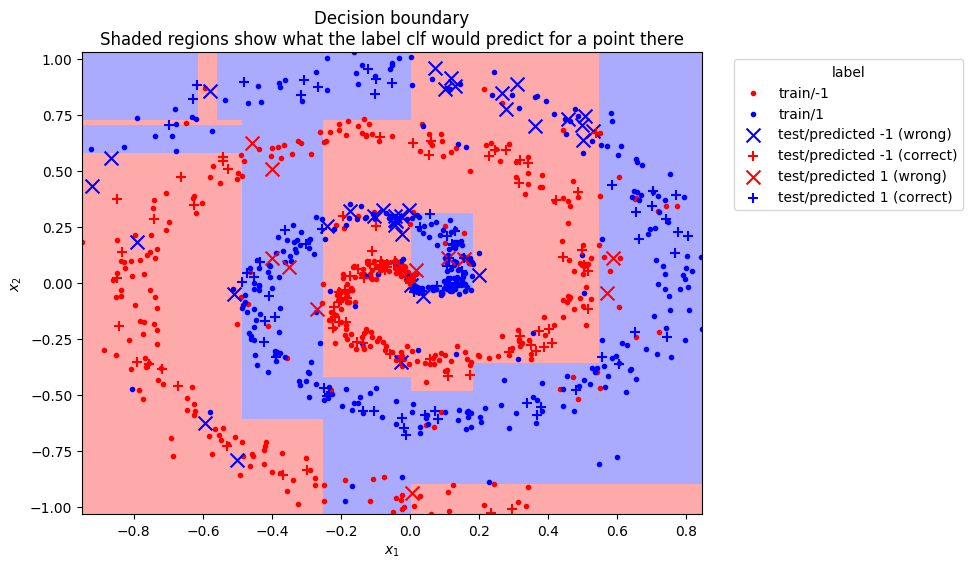

In [21]:
depth = 5

print(f'depth: {depth}')
dt_clf = DecisionTreeScratch(max_depth=depth)
dt_clf.fit(spirals.X_train, spirals.y_train)

spirals.print_errors(dt_clf)

utils.plot_decision_boundary(dt_clf, spirals.X_train, spirals.y_train, spirals.X_test, spirals.y_test)
plt.show()
# Node.print_tree(clf.tree) # for debugging

### [Task 8 (Optional)] Compare trees trained with `scikit-learn` and `DecisionTreeScratch`

In the `DecisionTreeScratch` and `Node` implementation above, we give you a `Node.print_tree(clf)` function that visualizes the tree. `scikit-learn` also has such a visualization method, albeit more visually appealing&mdash;it actually plots the tree! We show how to visualize both trees (depth limited to 3). In this optional task, you should play with other hyperparameters of `scikit-learn` and plot the trees you obtain.

|-[ Split X[1] at 0.005 | gini: 0.500 | #samples: [408, 392] ]
|---[ Split X[2] at 0.732 | gini: 0.461 | #samples: [267, 151] ]
|-----[ Split X[1] at -0.488 | gini: 0.436 | #samples: [266, 126] ]
|-------[ Label -1 | gini: 0.203 | #samples: [77, 10] ]
|-------[ Label -1 | gini: 0.471 | #samples: [189, 116] ]
|-----[ Split X[1] at -0.565 | gini: 0.074 | #samples: [1, 25] ]
|-------[ Label 1 | gini: 0.320 | #samples: [1, 4] ]
|-------[ Label 1 | gini: 0.000 | #samples: [0, 21] ]
|---[ Split X[2] at -0.894 | gini: 0.466 | #samples: [141, 241] ]
|-----[ Label -1 | gini: 0.000 | #samples: [11, 0] ]
|-----[ Split X[1] at 0.189 | gini: 0.455 | #samples: [130, 241] ]
|-------[ Label 1 | gini: 0.375 | #samples: [45, 135] ]
|-------[ Label 1 | gini: 0.494 | #samples: [85, 106] ]


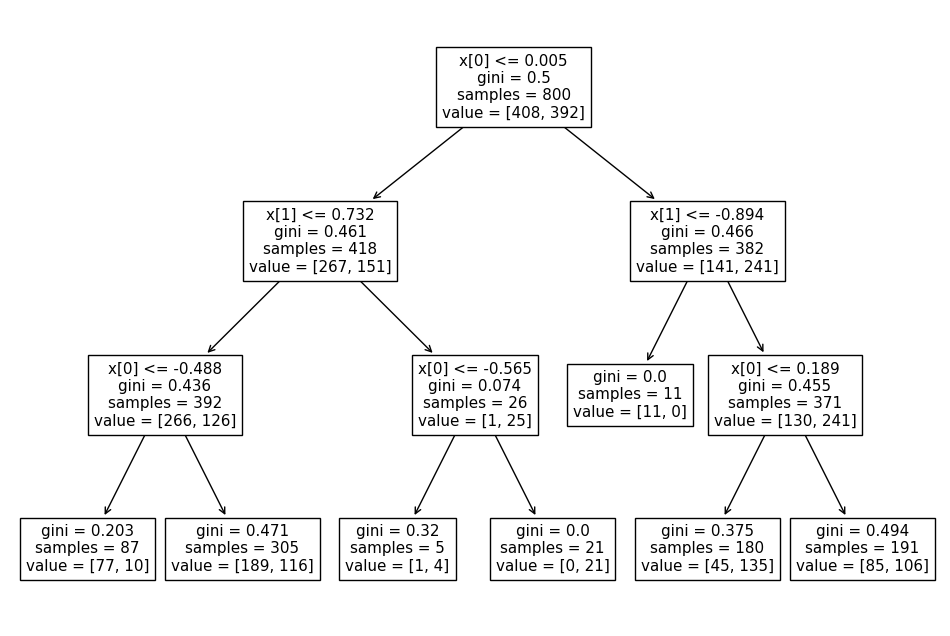

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeScratch(max_depth=3)
dt_clf.fit(spirals.X_train, spirals.y_train)

Node.print_tree(dt_clf.tree) # for debugging

from sklearn.tree import plot_tree

dt_clf = DecisionTreeClassifier(max_depth=3)
dt_clf.fit(spirals.X_train, spirals.y_train)

fig, ax = plt.subplots(figsize=(12, 8))
_ = plot_tree(dt_clf, ax=ax)

#### TASK 8 CODE (optional)
#### TASK 8 CODE (optional)

### [Task 9] The `max_depth` of decision trees
The `max_depth` is one of the most import hyperparameters of decision trees. In fact, let $\mathcal{H}^{dt}_i$ denotes the hypothesis class of decision trees with depth no larger then $i$, we have $\mathcal{H}^{dt}_i \subset \mathcal{H}^{dt}_j$ for all $i < j$. Therefore, `max_depth` defines the complexity of the hypothesis class of decision trees.

In this task, please train decision trees with different `max_depth` parameters on spiral data. Show the plots of the training and testing errors as functions of `max_depth`. How does `max_depth` affect the train and test error of decision trees?

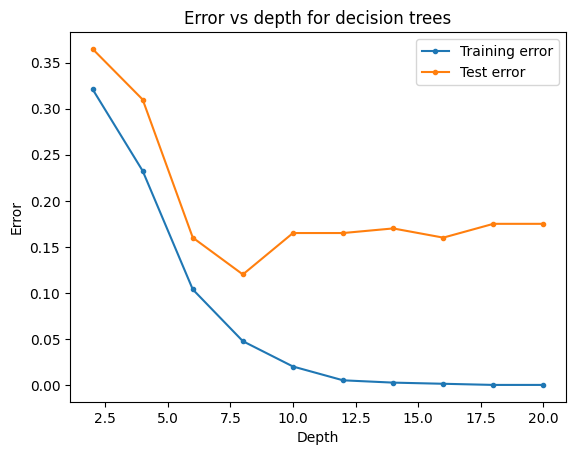

In [23]:
depths = list(range(2, 21, 2))
train_errs = np.zeros((len(depths)))
val_errs = np.zeros_like(train_errs)
for i, depth in enumerate(depths):
    # TASK 9 CODE
    dt_clf = DecisionTreeClassifier(max_depth=depth)
    dt_clf.fit(spirals.X_train, spirals.y_train)

    # utils.plot_decision_boundary(dt_clf, spirals.X_train, spirals.y_train, spirals.X_test, spirals.y_test)

    train_errs[i] = utils.empirical_err(dt_clf, spirals.X_train, spirals.y_train)
    val_errs[i] = utils.empirical_err(dt_clf, spirals.X_test, spirals.y_test)
    # TASK 9 CODE

plt.figure()
plt.plot(depths, train_errs, label='Training error', marker='.')
plt.plot(depths, val_errs, label='Test error', marker='.')
plt.legend()
plt.xlabel('Depth')
plt.ylabel('Error')
plt.title(f'Error vs depth for decision trees')
plt.show()

### Decision trees for text data: vectorizing the text first

Now, let's implement a decision tree on the spam prediction dataset. To collect the data points, we will leverage the provided `SMS_Vectorizer` to convert SMS messages into vector representations. Upon initialization, `SMS_Vectorizer` identifies the `d` words with the highest frequency in a given document (presumably the training data) and designates them as `high_freq_words`. Subsequently, in its vectorization method, the vectorizer counts the occurrences of each high-frequency word in each sentence and utilizes these counts as the vector representation of the sentence. With this vectorizer, any text sequence can be converted into a `d`-dimensional vector.

It's important to note that the method we implement here is just one of many approaches to attain vector representation of text. We encourage you to experiment with other methods and share your observations with us!

In [24]:
class SMS_Vectorizer:
    def __init__(self, sentences, d):
        # Count the total occurrences of each word in sentences
        word_freq = {}
        for sentence in sentences:
            for word in sentence.lower().split():
                if word not in word_freq:
                    word_freq[word] = 1
                else:
                    word_freq[word] += 1

        # Save the d words with the highest frequency
        self.high_freq_words = sorted([(word_freq[word], word) for word in word_freq], reverse=True)[: d]
        self.high_freq_words = [item[1] for item in self.high_freq_words]

    def vectorize(self, sentences):
        # vector[i][j]: how many occurrences of self.high_freq_words[j] we find in sentences[i]
        vectors = np.zeros((len(sentences), len(self.high_freq_words)))
        for i, sentence in enumerate(sentences):
            sentence = sentence.lower().split()
            for j, word in enumerate(self.high_freq_words):
                vectors[i][j] = sentence.count(word)
        return np.array(vectors)

### [Task 10] Decision trees for spam prediction
Please show the plots of the training and testing errors as functions of `max_depth`.

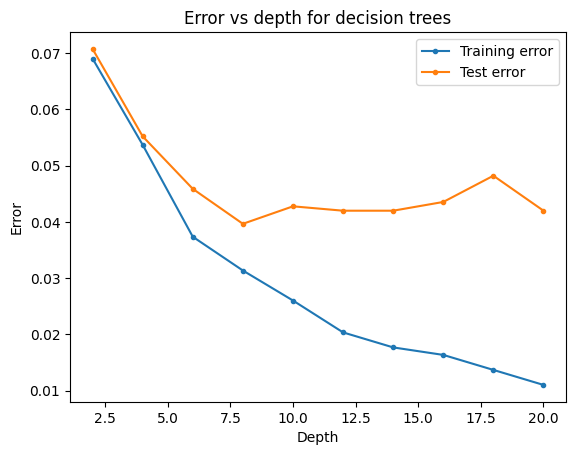

In [25]:
Vectorizer = SMS_Vectorizer(spamdata.X_train, d=300)
vectorized_data = TrainAndTestData(Vectorizer.vectorize(spamdata.X_train), spamdata.y_train, Vectorizer.vectorize(spamdata.X_test), spamdata.y_test)

depths = list(range(2, 21, 2))
train_errs = np.zeros((len(depths)))
val_errs = np.zeros_like(train_errs)
dt_clfs = [None for _ in range(len(depths))]
for i, depth in enumerate(depths):
    # TASK 10 CODE
    dt_clf = DecisionTreeClassifier(max_depth=depth)
    dt_clf.fit(vectorized_data.X_train, vectorized_data.y_train)

    train_errs[i] = utils.empirical_err(dt_clf, vectorized_data.X_train, vectorized_data.y_train)
    val_errs[i] = utils.empirical_err(dt_clf, vectorized_data.X_test, vectorized_data.y_test)
    dt_clfs[i] = dt_clf
    # TASK 10 CODE

plt.figure()
plt.plot(depths, train_errs, label='Training error', marker='.')
plt.plot(depths, val_errs, label='Test error', marker='.')
plt.legend()
plt.xlabel('Depth')
plt.ylabel('Error')
plt.title(f'Error vs depth for decision trees')
plt.show()

<span style="color: red">
<h4 style="font-weight: bold">[Answer Questions]</h4>
Which depth results in the best test error? What is the error value? Now, we select the predictor with the lowest test error and evalute its performance and confidence interval on the same test set. In this context, is the test error for that predictor still an unbiased estimator of its generalization error? If not, how would you obtain an unbiased estimator of the generalization error for this predictor?<br>

<h4 style="font-weight: bold">---------------------</h4>

<span style="color: blue">
Answer: If we use the test set for hyper-parameter tuning, even though we re-train the model, the evaluation results on the test set will no longer be an unbiased estimator of the generalization error of the model. To fix this issue, we can use 2 test sets, one for hyper-parameter tuning and the other one for evaluation. This is exactly the same idea as having separate validation and test sets.
</span>

<h4 style="font-weight: bold">---------------------</h4>
</span>

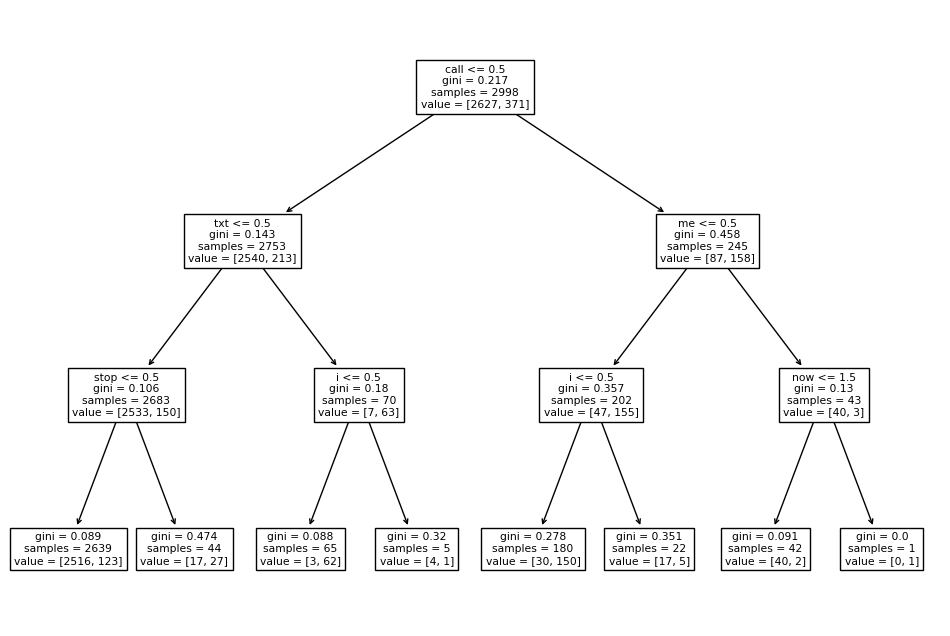

In [26]:
dt_clf = DecisionTreeClassifier(max_depth=3)
dt_clf.fit(vectorized_data.X_train, vectorized_data.y_train)

fig, ax = plt.subplots(figsize=(12, 8))
_ = plot_tree(dt_clf, ax=ax, feature_names=Vectorizer.high_freq_words)

<span style="color: red">
<h4 style="font-weight: bold">[Answer Questions]</h4>
Above, we have presented a decision tree with max_depth=$3$ trained on the spam prediction dataset. Please use the provided code to experiment with different hyperparameter setups. What differences in the tree structures do you observe when using different values of max_depth for training decision trees?
<br>

<h4 style="font-weight: bold">---------------------</h4>

<span style="color: blue">
Answer: The tree becomes less balanced as the depth increases. This is because the task does not require such a complicated model. So our decision tree often stops splitting before it reaches `max_depth`.
</span>

<h4 style="font-weight: bold">---------------------</h4>
</span>